In [59]:
import numpy as np
import matplotlib.pyplot as plt
#import scipy.fftpack as scfft

plt.rcParams['figure.figsize'] = [8, 5]

#<span style="color:red">word</span>

In [80]:
def PFB(tap, signal, fs):
    '''
    Arguments:
        tap: the number of taps of the PFB;
        signal: the signal that needs to be processed
        fs: the sampling rate of the signal (samples per second)
        
    Returns:
        FFT_sum: the real-DFT of the signal
        FFT_freq: the absolute frequency (in Hz), on the x-axis
    '''
    N = len(signal)
    if N % tap != 0: # cut the signal short if modulo is not zero
        signal = signal[:N - (N % tap)]
        N = N - (N % tap)
    t = np.arange(N) # x-axis in terms of frequency channels
    t_sinc = np.linspace(-1,1,N) # generation for the sinc function
    sinc = np.sinc(tap / 2 * t_sinc)
    
    conv = sinc*signal # convolution step
    conv_list = []
    for i in range(tap):
        conv_list.append(np.array(conv[i*(N//tap):(i+1)*(N//tap)]))
    conv_array = np.array(conv_list)
    conv_sum = np.sum(conv_array, axis=0)
    
    FFT_sum = np.fft.rfft(conv_sum) # real-FFT step
    FFT_freq = np.fft.rfftfreq(N//tap)*fs
    
    return FFT_sum, FFT_freq

In [76]:
FFT,freq = PFB(4, sine, 2048)

In [77]:
print(FFT)

[1.96598582e-02+0.00000000e+00j 1.97568922e-02-2.69169329e-03j
 2.00509881e-02-5.43283486e-03j ... 9.14396717e-05-1.73117864e-07j
 9.14393917e-05-8.65587607e-08j 9.14392985e-05+0.00000000e+00j]


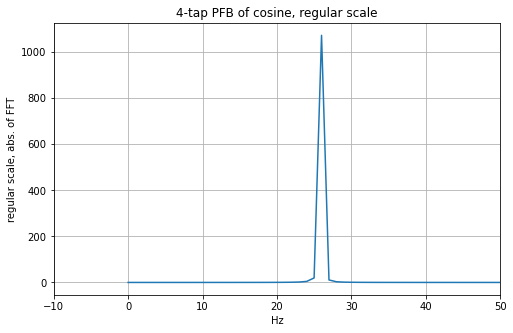

In [79]:
plt.plot(freq, np.abs(FFT))

plt.xlim(-10,50)
plt.xticks(np.arange(-10,50+9,10))

plt.title('4-tap PFB of cosine, regular scale')
plt.ylabel('regular scale, abs. of FFT')
plt.xlabel('Hz')

plt.grid()
plt.show()

In [70]:
N = 1024
tap=4
t = np.linspace(-1,1,1024)
sinc = np.sinc(tap/2*t)
print(sinc)

[-3.89817183e-17 -1.95881460e-03 -3.92502221e-03 ... -3.92502221e-03
 -1.95881460e-03 -3.89817183e-17]


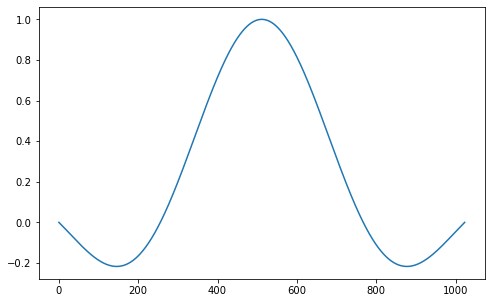

In [68]:
plt.plot(np.arange(N), sinc)

In [69]:
np.abs(np.fft.rfft(sinc))[:10]

array([230.8973934 , 287.10014198, 121.97345157,  17.74407331,
         8.13087489,   4.77644846,   3.17224122,   2.2700896 ,
         1.70897016,   1.3348922 ])

In [48]:
b = np.array([1,2,3,4,5,6])

In [53]:
conv_array = []
for i in range(3):
    conv_array.append(np.array(b[i*(6//3):(i+1)*(6//3)]))
    print(conv_array)
    
conv_array = np.array(conv_array)
#conv_sum = np.sum(conv_array, axis=0)

print(conv_array)

[array([1, 2])]
[array([1, 2]), array([3, 4])]
[array([1, 2]), array([3, 4]), array([5, 6])]
[[1 2]
 [3 4]
 [5 6]]


In [25]:
a = np.array([np.array([1,2]),np.array([3,4]),np.array([5,6])])

In [29]:
np.sum(a,axis=0)

array([ 9, 12])